In [1]:
from IPython.display import IFrame
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## Features

In [2]:
keys = ['AMG', 'ATF', 'ATI', 'ATP', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Others',
        'GCC', 'GLI', 'LIN', 'LIP', 'MAC', 'MON', 'NTI', 'OTR', 'OXA', 'PAP',
        'PEN', 'POL', 'QUI', 'SUL', 'TTC',
        'MV hours', '# pat$_{atb}$', '# pat$_{MDR}$',
        'CAR$_{n}$', 'PAP$_{n}$', 'Others$_{n}$',
        'QUI$_{n}$', 'ATF$_{n}$', 'OXA$_{n}$', 'PEN$_{n}$',
        'CF3$_{n}$', 'GLI$_{n}$', 'CF4$_{n}$', 'SUL$_{n}$',
        'NTI$_{n}$', 'LIN$_{n}$', 'AMG$_{n}$', 'MAC$_{n}$',
        'CF1$_{n}$', 'GCC$_{n}$', 'POL$_{n}$', 'ATI$_{n}$',
        'MON$_{n}$', 'LIP$_{n}$', 'TTC$_{n}$', 'OTR$_{n}$',
        'CF2$_{n}$', 'ATP$_{n}$', 
        '# pat$_{tot}$',
        'Post change',
        'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'Hepatic$_{fail}$',
        'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
        'Respiratory$_{fail}$', 'Multiorganic$_{fail}$',  '# transfusions',
        'Vasoactive drug', 'NEMS', 'Tracheo$_{hours}$', 'Ulcer$_{hours}$',
        'Hemo$_{hours}$', 'C01 PICC 1',
        'C01 PICC 2', 'C02 CVC - RJ',
        'C02 CVC - RS', 'C02 CVC - LS', 'C02 CVC - RF',
        'C02 CVC - LJ', 'C02 CVC - LF', '# catheters']

binary = ['AMG', 'ATF', 'ATI', 'ATP', 'CAR', 'CF1',
            'CF2', 'CF3', 'CF4', 'Others', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC',
            'MON', 'NTI', 'OTR', 'OXA', 'PAP', 'PEN', 'POL', 'QUI', 'SUL', 'TTC',
            'Post change',
            'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'Hepatic$_{fail}$',
            'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
            'Respiratory$_{fail}$', 'Multiorganic$_{fail}$',  'Vasoactive drug']

continues =  [variable for variable in keys if variable not in binary]

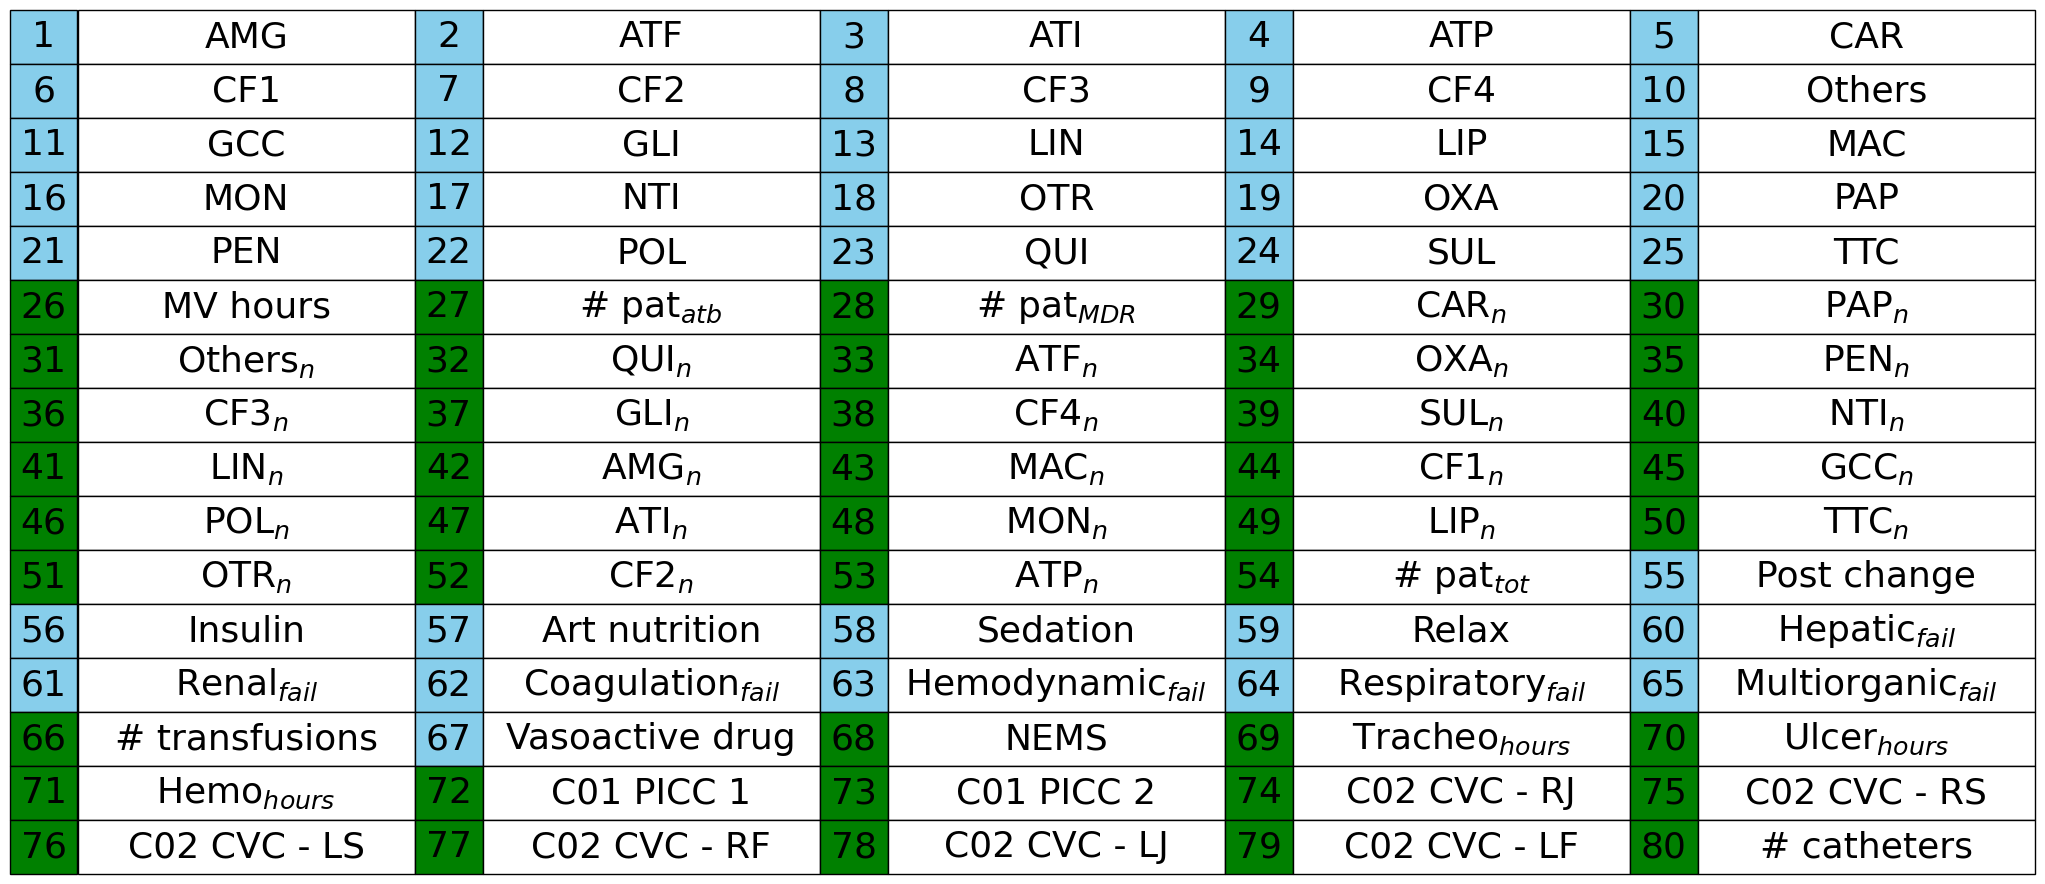

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

nodes = [f"{i}" for i in range(1, 81)]
features = keys

data = []
for node, feature in zip(nodes, features):
    data.append(node)
    data.append(feature)

df = pd.DataFrame([data[i:i + 10] for i in range(0, len(data), 10)])

fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df.values, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(26)


# Paint the number cells green
for i in range(0, 10, 2):
    for j in range(len(df)):
        cell = table[(j, i)]
        cell.set_width(0.05)
        cell.set_facecolor('green')
        cell.set_height(0.1)

# Paint the number cells blue if the associated variable is binary
for i in range(0, 10, 2):  # Numbers are in even columns
    for j in range(len(df)):
        variable_name = df.iloc[j, i + 1]  # Text in odd column (variable)
        cell = table[(j, i)]
        if variable_name in binary:
            cell.set_facecolor('skyblue')  # Paint blue if it is a binary variable

for i in range(1, 10, 2):
    for j in range(len(df)):
        cell = table[(j, i)]
        cell.set_width(0.25)
        cell.set_facecolor('white')
        cell.set_height(0.1)


plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

pdf_filename = "./Figures/features.pdf"
pdf = PdfPages(pdf_filename)
pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
pdf.close()
plt.show()


## Note: I only visualize for one split; if you want to visualize for the rest, simply change the following parameter.

In [8]:
th_folder = "th_0975"
# Others options: "th_06"; "th_0725"; "th_085"
buildGraph = "dtw-hgd"
# Others options: "correlations"; "smoothness"
folder = "s1"
# Other options: "s2", "s3"

## App1) Considering all time steps to estimate the graph

In [9]:
pdf_path = "./Figures/" + th_folder + "/" + folder + "/"+buildGraph + "_AdjtoProdGraph.pdf"
display(IFrame(pdf_path, width=600, height=400))

In [10]:
pdf_path = "./Figures/" + th_folder + "/" + folder + "/"+buildGraph + "_Graph.pdf"
display(IFrame(pdf_path, width=600, height=400))

## App2) Considering each time step to estimate each of the T graphs
* Note: In this case, we only visualize the first time step. If you want to visualize other time steps, you only need to modify the hyperparameter `timeStep`.

In [7]:
timeStep = 0

In [8]:
pdf_path = "./Figures/" + th_folder + "/" + folder + "/"+buildGraph + "_AdjtoSpatioTemporal_"+str(timeStep)+".pdf"
display(IFrame(pdf_path, width=600, height=400))

In [9]:
pdf_path = "./Figures/" + th_folder + "/" + folder + "/"+buildGraph + "_Graph_"+str(timeStep)+".pdf"
display(IFrame(pdf_path, width=600, height=400))

### All time steps

In [10]:
for ts in range(0,14,1):
    pdf_path = "./Figures/" + th_folder + "/" + folder + "/"+buildGraph + "_Graph_"+str(ts)+".pdf"
    display(IFrame(pdf_path, width=600, height=400))